From: https://blog.dominodatalab.com/fitting-support-vector-machines-quadratic-programming

In [112]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.svm import SVC 
import pandas as pd
from cvxopt import matrix, solvers
from sklearn.datasets import load_iris
import matplotlib

In [113]:
iris = load_iris()
iris_df = pd.DataFrame(data= np.c_[iris["data"], iris["target"]], columns= iris["feature_names"] + ["target"])
# Retain only 2 linearly separable classes
iris_df = iris_df[iris_df["target"].isin([0,1])]
iris_df["target"] = iris_df[["target"]].replace(0,-1)
# Select only 2 attributes
iris_df = iris_df[["petal length (cm)", "petal width (cm)", "target"]]
iris_df

,petal length (cm),petal width (cm),target
0,1.4,0.2,-1.0
1,1.4,0.2,-1.0
2,1.3,0.2,-1.0
3,1.5,0.2,-1.0
4,1.4,0.2,-1.0
...,...,...,...
95,4.2,1.2,1.0
96,4.2,1.3,1.0
97,4.3,1.3,1.0
98,3.0,1.1,1.0


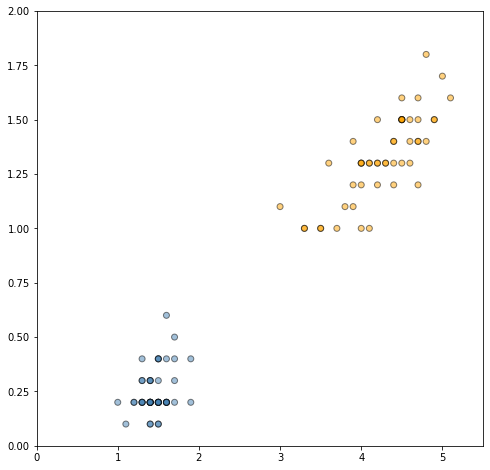

In [114]:
X = iris_df[["petal length (cm)", "petal width (cm)"]].to_numpy()
y = iris_df[["target"]].to_numpy()
plt.figure(figsize=(8, 8))
colors = ["steelblue", "orange"]
plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), alpha=0.5, cmap=matplotlib.colors.ListedColormap(colors), edgecolors="black")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()

In [115]:
n = X.shape[0]
H = np.dot(y*X, (y*X).T)
q = np.repeat([-2.0], n)[..., None]
A = y.reshape(1, -1)
b = 0.0
G = np.negative(np.eye(n))
h = np.zeros(n)

In [116]:
P = matrix(H)
q = matrix(q)
G = matrix(G)
h = matrix(h)
A = matrix(A)
b = matrix(b)

In [117]:
sol = solvers.qp(P, q, G, h, A, b)
alphas = np.array(sol["x"])

In [118]:
w = np.dot((y * alphas).T, X)[0]

In [119]:

S = (alphas > 1e-5).flatten()
b = np.mean(y[S] - np.dot(X[S], w.reshape(-1,1)))
print("W:", w)
print("b:", b)

W: [2.58823562 1.64705875]
b: -7.576471343601107


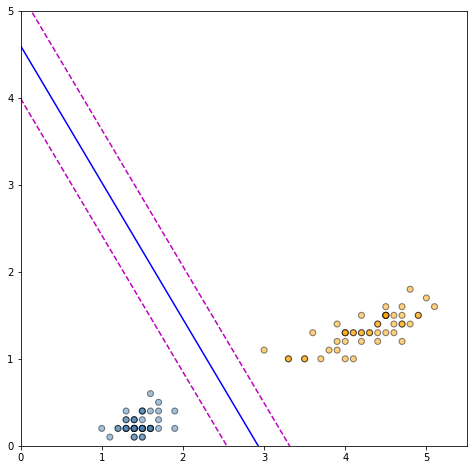

In [120]:
x_min = 0
x_max = 5.5
y_min = 0
y_max = 5
xx = np.linspace(x_min, x_max)
a = -w[0]/w[1]
yy = a*xx - (b)/w[1]
margin = 1 / np.sqrt(np.sum(w**2))
yy_neg = yy - np.sqrt(1 + a**2) * margin
yy_pos = yy + np.sqrt(1 + a**2) * margin
plt.figure(figsize=(8, 8))
plt.plot(xx, yy, "b-")
plt.plot(xx, yy_neg, "m--")
plt.plot(xx, yy_pos, "m--")
colors = ["steelblue", "orange"]
plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), alpha=0.5, cmap=matplotlib.colors.ListedColormap(colors), edgecolors="black")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()